## The aim is to graph a plotbar with the amount of emails in "inbox" and "send" folders. 

In [22]:
# Documentation : https://docs.microsoft.com/en-us/office/vba/api/outlook.oldefaultfolders

In [23]:
#pip install pywin32

In [24]:
import numpy as np
from scipy import stats
import pandas as pd
import time
#import math
#importing packages
import seaborn as sns
import matplotlib.pyplot as plt

In [25]:
from pathlib import Path

In [26]:
import win32com.client  #pip install pywin32

In [27]:
# Connect to outlook
outlook = win32com.client.Dispatch("Outlook.Application").GetNamespace("MAPI")

In [28]:
import time

In [ ]:
#In this case the two folders to analyze are inbox and send. 

In [29]:
# Connect to folder
inbox_reject = outlook.Folders("pablocalatayudpelayo@gmail.com").Folders("inbox")
messages_rejected = inbox_reject.Items

dates_reject=[]

messages = inbox_reject.Items

for message in messages:
    
    #subject = message.Subject
    #body = message.body
    #attachments = message.Attachments
    dates_reject.append(message.SentOn.strftime("%Y-%m-%d"))

In [30]:
# Connect to folder <Applications>
inbox_application = outlook.Folders("pablocalatayudpelayo@gmail.com").Folders("send")
messages_application = inbox_application.Items
dates_application=[]
messages = inbox_application.Items
for message in messages:
    
    #subject = message.Subject
    #body = message.body
    #attachments = message.Attachments
    dates_application.append(message.SentOn.strftime("%Y-%m-%d"))

In [31]:
print("Number of emails in inbox Folder: ",len(dates_inbox))

Number of emails in inbox Folder:  1119


In [32]:
print("Number of emails in sent Folder: ",len(dates_sent))

Number of emails in sent Folder:  0


# Create Data Frame - group by

In [33]:
start = "06-01-2022"
end = "12-31-2022"
idx = pd.date_range(start, end, freq="D")
ts = pd.Series(range(len(idx)), index=idx)

In [34]:
ts = pd.Series(range(len(idx)), index=idx)

In [35]:
ts.index

DatetimeIndex(['2022-06-01', '2022-06-02', '2022-06-03', '2022-06-04',
               '2022-06-05', '2022-06-06', '2022-06-07', '2022-06-08',
               '2022-06-09', '2022-06-10',
               ...
               '2022-12-22', '2022-12-23', '2022-12-24', '2022-12-25',
               '2022-12-26', '2022-12-27', '2022-12-28', '2022-12-29',
               '2022-12-30', '2022-12-31'],
              dtype='datetime64[ns]', length=214, freq='D')

In [36]:
count_emils = pd.DataFrame(index=ts.index,columns = ["inbox","send"])

In [37]:
count_emils["Date"]=count_emils.index

In [38]:
count_emils

,inbox,send,Date
2022-06-01,NaN,NaN,2022-06-01
2022-06-02,NaN,NaN,2022-06-02
2022-06-03,NaN,NaN,2022-06-03
2022-06-04,NaN,NaN,2022-06-04
2022-06-05,NaN,NaN,2022-06-05
...,...,...,...
2022-12-27,NaN,NaN,2022-12-27
2022-12-28,NaN,NaN,2022-12-28
2022-12-29,NaN,NaN,2022-12-29
2022-12-30,NaN,NaN,2022-12-30


In [39]:
for i in count_emils.index:
    
    day = str(i)[0:10]
    
    app = dates_application.count(day)
    rej = dates_reject.count(day)

    count_emils.loc[day]=[app,rej,count_emils.loc[day]["Date"]]

In [40]:
count_emils.tail(3)

,inbox,send,Date
2022-12-29,0,0,2022-12-29
2022-12-30,0,0,2022-12-30
2022-12-31,0,0,2022-12-31


In [357]:
import numpy as np
import matplotlib.pyplot as plt

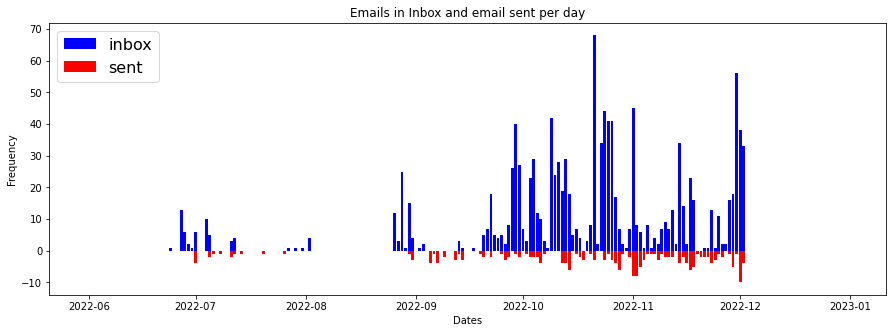

In [42]:
# Create bars
plt.figure(figsize=(15,5))
plt.bar(count_emils.index, count_emils.inbox,color='blue',label="inbox")
plt.bar(count_emils.index, -count_emils.send,color='red',label="sent")
plt.title("Emails in Inbox and email sent per day")
plt.ylabel("Frequency")
plt.xlabel("Dates")
plt.legend(loc = "upper left",fontsize=16)
plt.show()

# Grouping by Weeks

In [359]:
count_emils.head(3)

,Applications,Rejections,Date
2022-06-01,0,0,2022-06-01
2022-06-02,0,0,2022-06-02
2022-06-03,0,0,2022-06-03


In [43]:
count_emils_groupby_week = count_emils.resample('W', on='Date')['inbox','send'].sum()

In [44]:
count_emils_groupby_week.head(4)

,inbox,send
Date,,
2022-06-05,0,0
2022-06-12,0,0
2022-06-19,0,0
2022-06-26,1,0


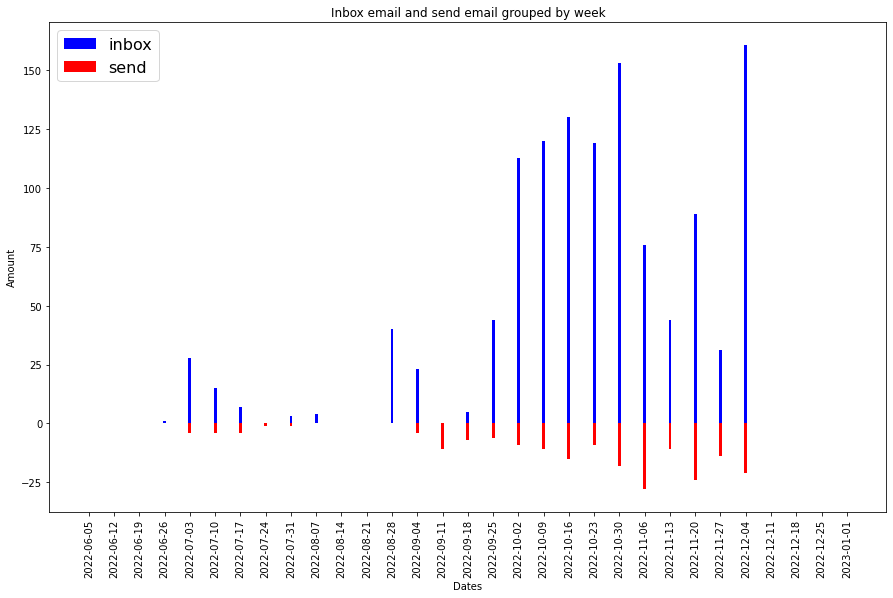

In [46]:
plt.figure(figsize=(15,9))
plt.bar(count_emils_groupby_week.index, count_emils_groupby_week.inbox,color='blue',label="inbox")
plt.bar(count_emils_groupby_week.index, -count_emils_groupby_week.send,color='red',label="send")
plt.title("Inbox email and send email grouped by week")
plt.ylabel("Amount")
plt.xlabel("Dates")
plt.xticks(count_emils_groupby_week.index,rotation = 90)
plt.legend(loc = "upper left",fontsize=16)
plt.show()